# 1. Creation Network Practice (생성 네트워크 실습)
- 생성하고 싶은 숫자 번호를 입력하면 MNIST와 유사한 숫자 이미지를 출력하는 네트워크 모델을 만드는 실습을 진행

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("mnist_train_small.csv", header=None)
data = np.array(data)

In [2]:
# 분류 네트워크와는 다르게 분류 정보가 입력, 이미지 데이터가 출력
# n(데이터 개수) * 784의 2차원으로 저장되어 있는 이미지 데이터는 n * 28 * 28의 3차원 배열로 변환하여 저장
y_train = data[:, 1:]
X_train = data[:, 0]
y_train = y_train.reshape(-1, 28, 28)

5

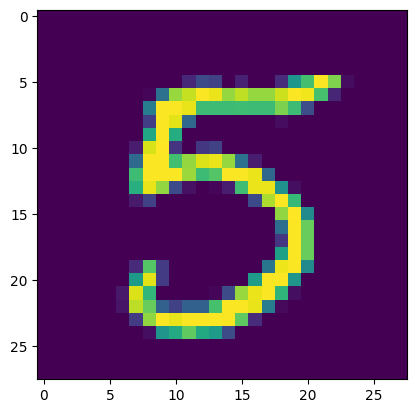

In [3]:
# 2차원 배열을 그림으로 보여줌
import matplotlib.pyplot as plt
plt.imshow(y_train[1, :, :])
X_train[1]

In [4]:
# to_categorical 함수를 사용하여 원-핫-인코딩 수행
# 출력 데이터는 0부터 1사이의 값으로 정규화
import tensorflow.keras as keras

X_train = keras.utils.to_categorical(X_train)
y_train = y_train / 255

In [5]:
# 네트워크 구성
from keras.models import Sequential
from keras import layers
from keras import optimizers

# 입력
model=Sequential()
# 완전 연결층 node=3136
model.add(layers.Dense(units=3136, input_shape=(10, ), activation="relu"))
# Reshape층 7 * 7 * n
model.add(layers.Reshape((7, 7, 64)))
# UpSampling층 stride=2
model.add(layers.UpSampling2D((2, 2)))
# 합성곱층 kernel=3, filter=16
model.add(layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))
# UpSampling층 stride=2
model.add(layers.UpSampling2D((2, 2)))
# 합성곱층 kernel=3, filter=32
model.add(layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
# 합성곱층 kernel=3, filter=1
model.add(layers.Conv2D(filters=1, kernel_size=3, padding="same", activation="sigmoid"))
model.compile(loss="mean_squared_error", optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=["accuracy"])

In [6]:
# 위에서 구성한 네트워크 구조를 확인할 수 있음
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3136)              34496     
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        9232      
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 28, 28, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4

In [7]:
# 학습
hist = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10


219/219 [==============================] - 6s 24ms/step - loss: 0.0636 - accuracy: 0.7964 - val_loss: 0.0549 - val_accuracy: 0.7980
Epoch 2/10
219/219 [==============================] - 5s 22ms/step - loss: 0.0544 - accuracy: 0.7909 - val_loss: 0.0559 - val_accuracy: 0.7765
Epoch 3/10
219/219 [==============================] - 4s 19ms/step - loss: 0.0541 - accuracy: 0.7914 - val_loss: 0.0537 - val_accuracy: 0.7940
Epoch 4/10
219/219 [==============================] - 4s 18ms/step - loss: 0.0540 - accuracy: 0.7917 - val_loss: 0.0536 - val_accuracy: 0.7901
Epoch 5/10
219/219 [==============================] - 7s 31ms/step - loss: 0.0539 - accuracy: 0.7918 - val_loss: 0.0537 - val_accuracy: 0.7961
Epoch 6/10
219/219 [==============================] - 7s 30ms/step - loss: 0.0539 - accuracy: 0.7920 - val_loss: 0.0544 - val_accuracy: 0.7840
Epoch 7/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0538 - accuracy: 0.7920 - val_loss: 0.0541 - val_accuracy: 0.79

In [8]:
# 테스트
# 4번째 위치의 값만 1이고 나머지는 0이며, 길이가 10인 numpy 배열을 만들고 predict 함수를 사용하여 결과를 확인
test_d = np.zeros((1, 10))
test_d[0, 4] = 1
o = model.predict(test_d)

1/1 [==============================] - 0s 133ms/step


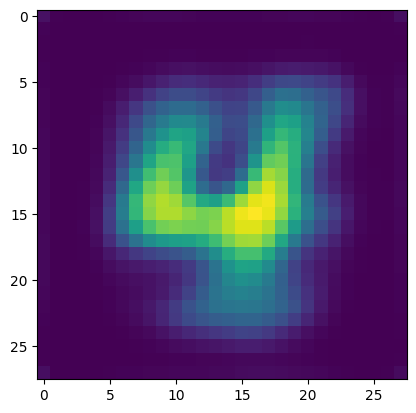

In [11]:
# 출력된 결과의 크기는 1 * 28  28 * 1인데, 이를 ㅣ28 * 28로 바꾸고, imshow 함수를 사용하여 결과를 확인해 볼 수 있음
im = o.reshape((28, 28))
plt.imshow(im);